AUTHOR: Adedolapo Sharon Olatunji

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import sklearn.preprocessing as sp
from sklearn.metrics import accuracy_score

%matplotlib inline

LOAD CREDIT CARD DATASET

In [2]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29794,35633,0.786689,-0.691214,-0.329291,0.149435,0.714779,1.949061,-0.136906,0.474172,0.206173,...,-0.165285,-0.793473,-0.030110,-2.358519,-0.096468,0.332321,-0.001435,0.025559,200.00,0.0
29795,35633,0.800996,-2.159993,0.008378,-1.081828,-1.768799,-0.445016,-0.571165,-0.162429,-1.785636,...,0.016930,-0.350492,-0.234889,0.062628,0.163018,-0.212022,-0.024151,0.077021,363.00,0.0
29796,35633,1.115726,-0.472602,0.983034,0.294673,-1.218768,-0.341755,-0.667340,0.171155,0.805427,...,0.104463,0.366801,-0.073219,0.623597,0.247275,1.121835,-0.060566,0.003541,36.92,0.0
29797,35634,1.239103,-1.000617,0.843324,-0.560021,-1.400343,-0.151696,-1.026058,-0.001637,-0.131138,...,0.325954,0.855203,-0.245683,-0.072671,0.512799,-0.023495,0.036574,0.035202,91.00,0.0


In [3]:
data.shape

(29799, 31)

In [4]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [5]:
# check for any null values
data.isnull().values.any()

True

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
data.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [19]:
data = data.dropna()

In [20]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [21]:
# drop duplicates
data = data.drop_duplicates()
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29793,35632,1.124072,-0.896437,-0.050263,-0.660483,-0.545078,0.191027,-0.448134,0.134930,-0.961901,...,0.306007,0.747245,-0.188116,-0.231248,0.562319,-0.031430,0.000160,0.001351,99.00,0.0
29794,35633,0.786689,-0.691214,-0.329291,0.149435,0.714779,1.949061,-0.136906,0.474172,0.206173,...,-0.165285,-0.793473,-0.030110,-2.358519,-0.096468,0.332321,-0.001435,0.025559,200.00,0.0
29795,35633,0.800996,-2.159993,0.008378,-1.081828,-1.768799,-0.445016,-0.571165,-0.162429,-1.785636,...,0.016930,-0.350492,-0.234889,0.062628,0.163018,-0.212022,-0.024151,0.077021,363.00,0.0
29796,35633,1.115726,-0.472602,0.983034,0.294673,-1.218768,-0.341755,-0.667340,0.171155,0.805427,...,0.104463,0.366801,-0.073219,0.623597,0.247275,1.121835,-0.060566,0.003541,36.92,0.0


In [22]:
data=data.dropna(axis=1)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29793,35632,1.124072,-0.896437,-0.050263,-0.660483,-0.545078,0.191027,-0.448134,0.134930,-0.961901,...,0.306007,0.747245,-0.188116,-0.231248,0.562319,-0.031430,0.000160,0.001351,99.00,0.0
29794,35633,0.786689,-0.691214,-0.329291,0.149435,0.714779,1.949061,-0.136906,0.474172,0.206173,...,-0.165285,-0.793473,-0.030110,-2.358519,-0.096468,0.332321,-0.001435,0.025559,200.00,0.0
29795,35633,0.800996,-2.159993,0.008378,-1.081828,-1.768799,-0.445016,-0.571165,-0.162429,-1.785636,...,0.016930,-0.350492,-0.234889,0.062628,0.163018,-0.212022,-0.024151,0.077021,363.00,0.0
29796,35633,1.115726,-0.472602,0.983034,0.294673,-1.218768,-0.341755,-0.667340,0.171155,0.805427,...,0.104463,0.366801,-0.073219,0.623597,0.247275,1.121835,-0.060566,0.003541,36.92,0.0


CHECK TARGET VARIABLES

In [23]:
fraud_cases=len(data[data['Class']==1])
fraud_cases

94

In [24]:
authentic_cases=len(data[data['Class']==0])
authentic_cases

29583

DATA ANALYSIS

<Axes: xlabel='Class', ylabel='count'>

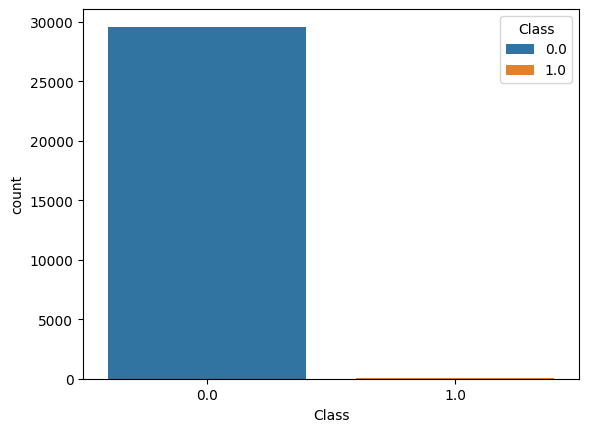

In [26]:
sb.countplot(x=data.Class ,hue=data.Class)

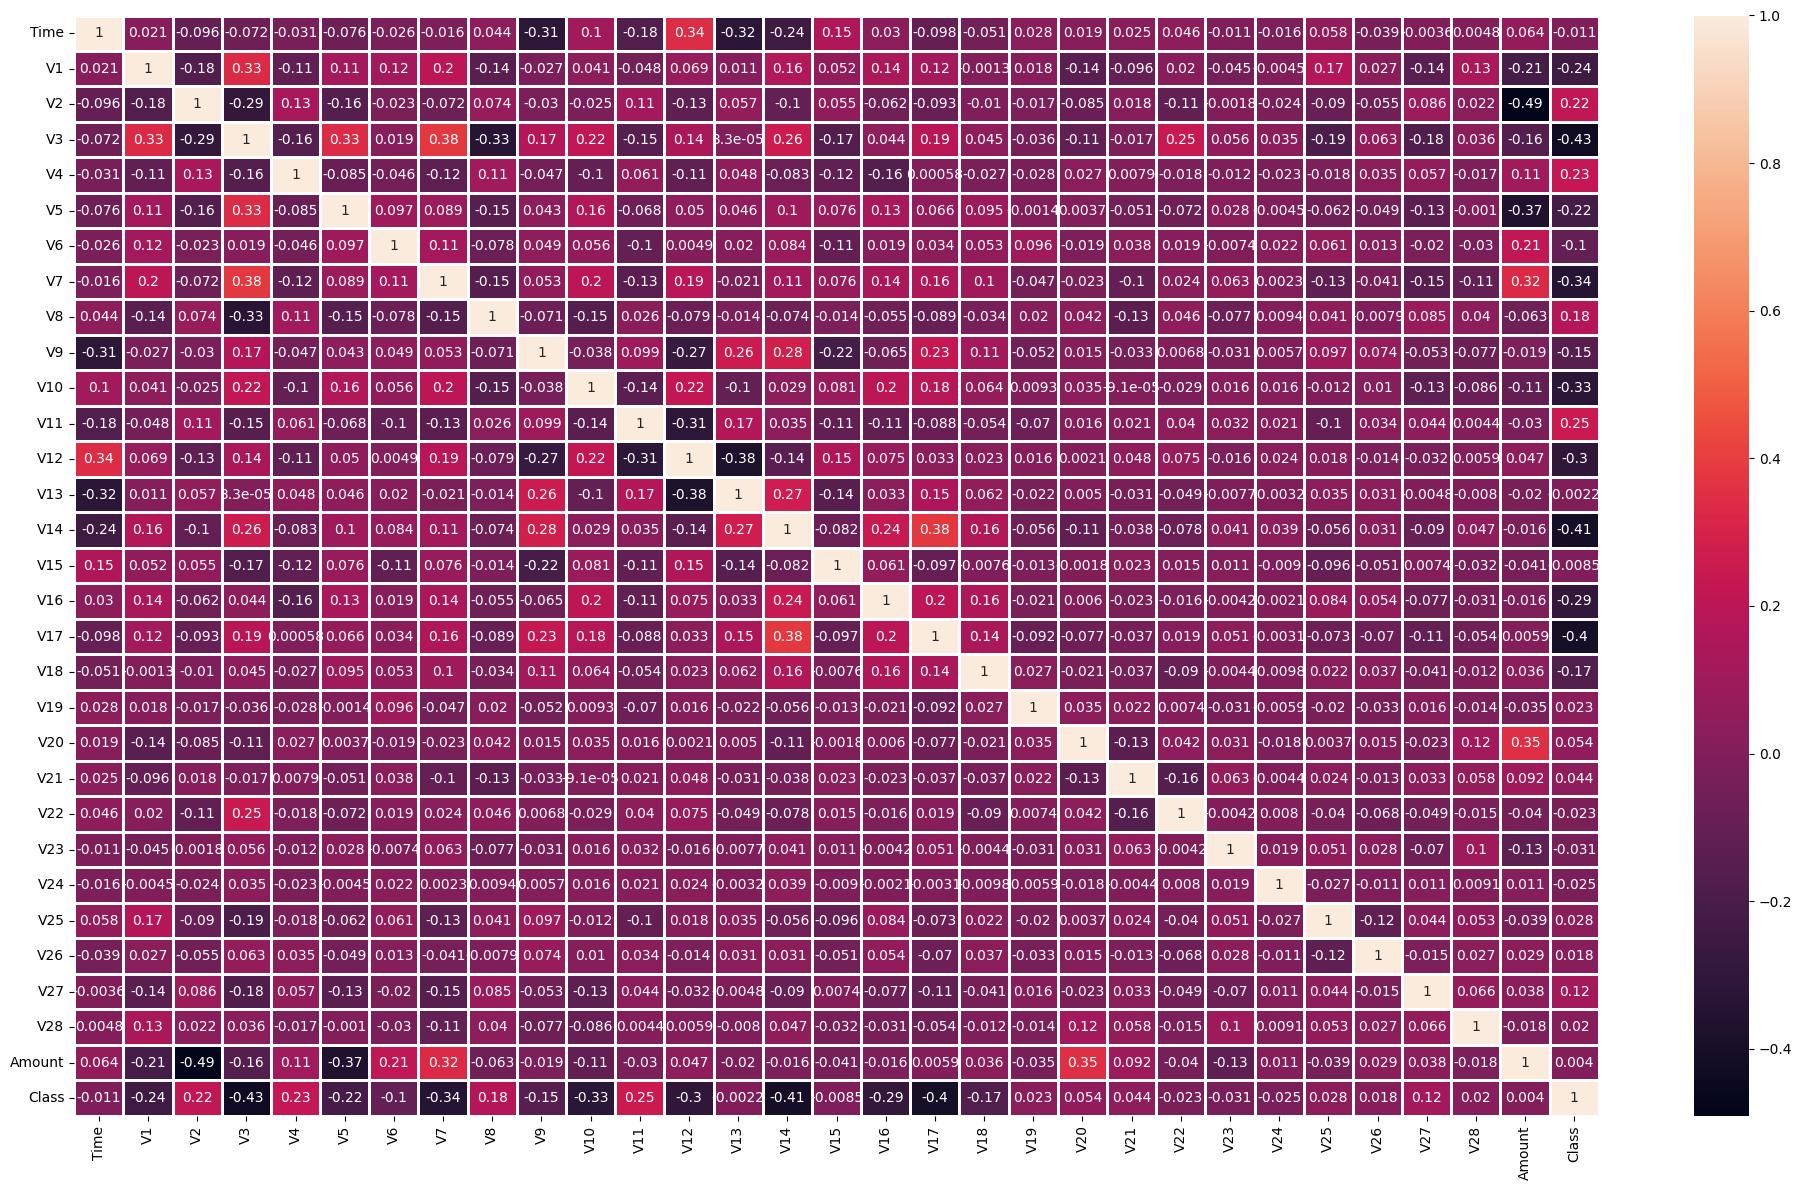

In [27]:
plt.figure(figsize=(20,12))
sb.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

<ipython-input-28-58ab0e94273f>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot((length//2), 3, j + 1)


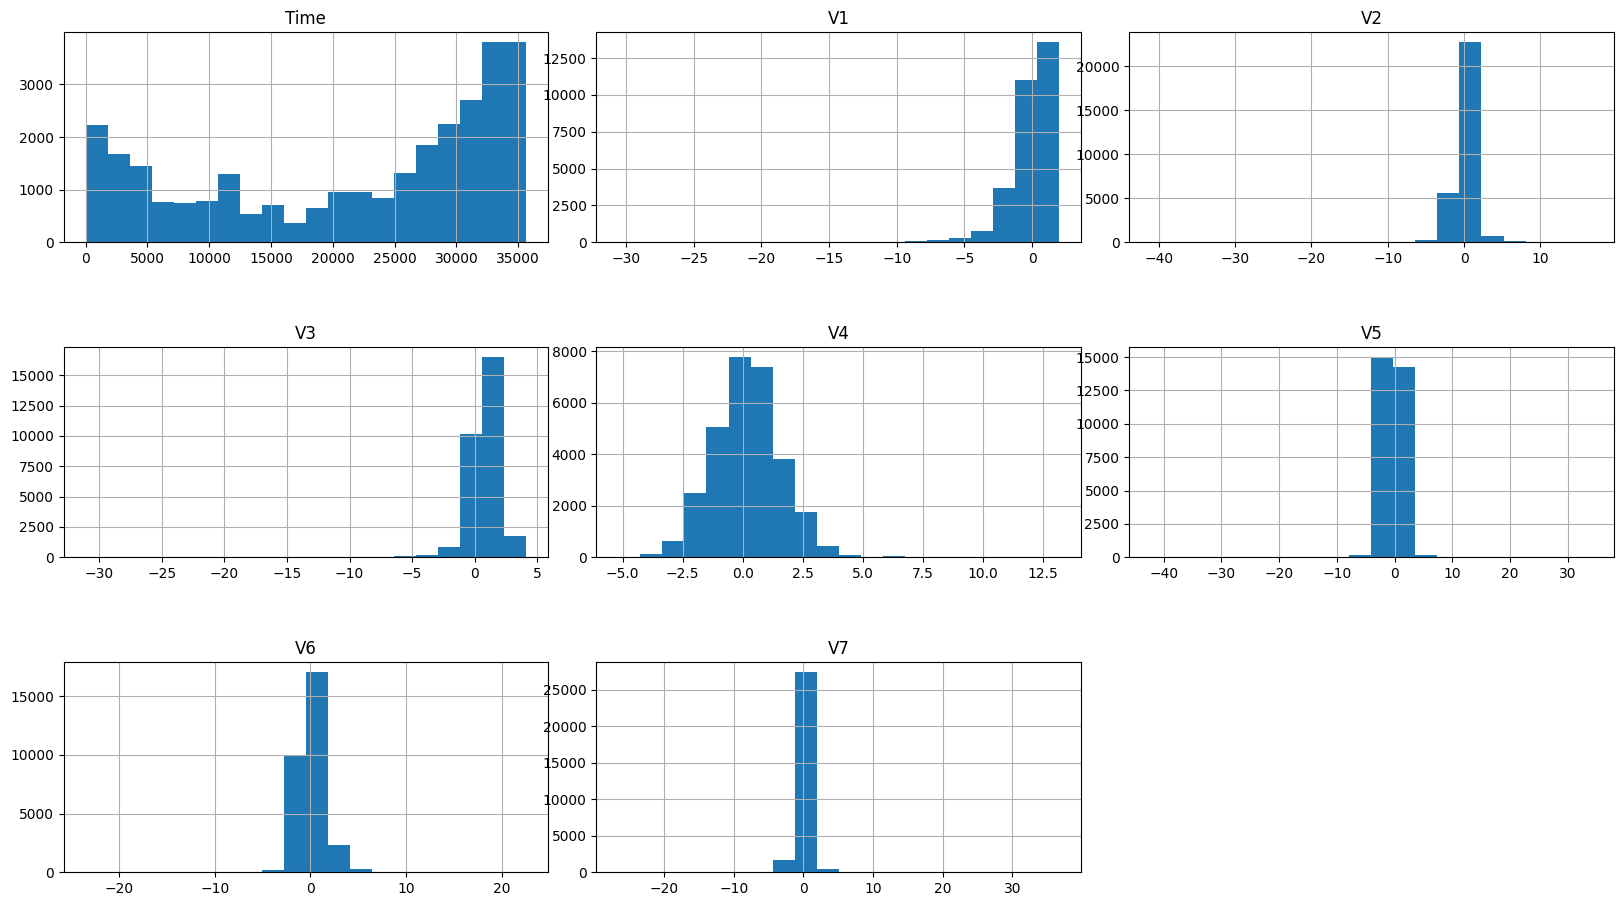

In [28]:
# Histogram of each feature
import itertools

col = data.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length//2), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    data[i].hist(bins = 20)
    plt.title(i)
plt.show()

array([[<Axes: xlabel='Time', ylabel='Time'>,
        <Axes: xlabel='V1', ylabel='Time'>,
        <Axes: xlabel='V2', ylabel='Time'>,
        <Axes: xlabel='V3', ylabel='Time'>,
        <Axes: xlabel='V4', ylabel='Time'>,
        <Axes: xlabel='V5', ylabel='Time'>,
        <Axes: xlabel='V6', ylabel='Time'>,
        <Axes: xlabel='V7', ylabel='Time'>,
        <Axes: xlabel='V8', ylabel='Time'>,
        <Axes: xlabel='V9', ylabel='Time'>,
        <Axes: xlabel='V10', ylabel='Time'>,
        <Axes: xlabel='V11', ylabel='Time'>,
        <Axes: xlabel='V12', ylabel='Time'>,
        <Axes: xlabel='V13', ylabel='Time'>,
        <Axes: xlabel='V14', ylabel='Time'>,
        <Axes: xlabel='V15', ylabel='Time'>,
        <Axes: xlabel='V16', ylabel='Time'>,
        <Axes: xlabel='V17', ylabel='Time'>,
        <Axes: xlabel='V18', ylabel='Time'>,
        <Axes: xlabel='V19', ylabel='Time'>,
        <Axes: xlabel='V20', ylabel='Time'>,
        <Axes: xlabel='V21', ylabel='Time'>,
        <Axes: xla

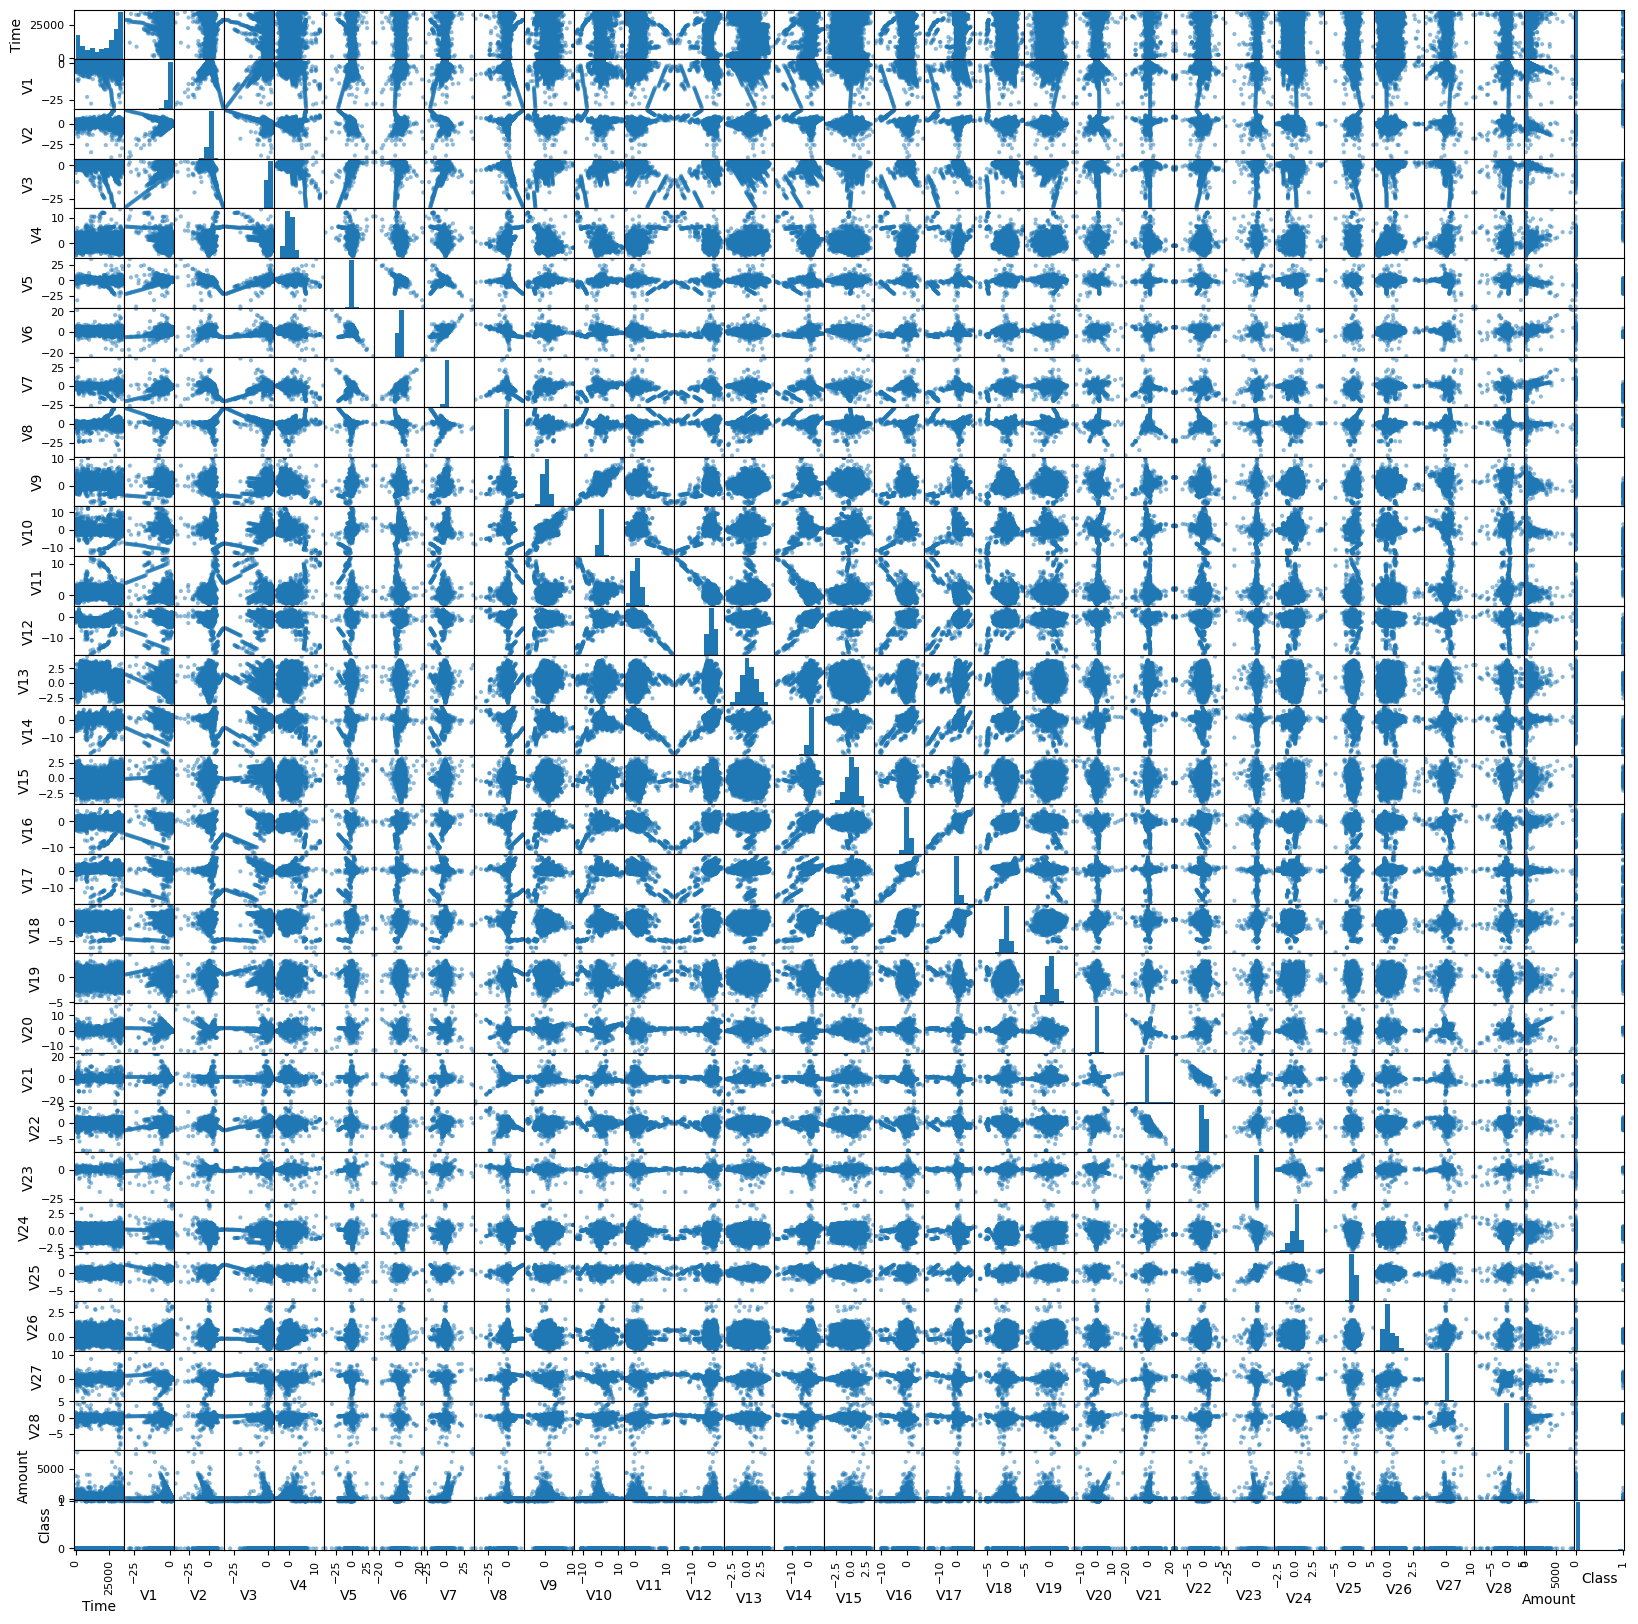

In [29]:
# Scatter plot matrix
import pandas as pd
from pandas.plotting import scatter_matrix

scatter_matrix(data, figsize=(20, 20))

FEATURES AND LABELS

In [30]:
X = data.drop('Class', axis=1)
y = data.Class

In [31]:
scalar = StandardScaler()
X=scalar.fit_transform(X)

DATA SPLITTING

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

MODEL (LOGISTIC REGRESSION)

In [33]:
from sklearn.linear_model import LogisticRegression
model_lm= LogisticRegression()

model_lm.fit(X_train,y_train)
pred_y=model_lm.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix
y_train_pred = ms.cross_val_predict(model_lm, X_train, y_train)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([[23651,    13],
       [   28,    49]])

MODEL EVALUATION

In [35]:
report=classification_report(y_test,pred_y)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5919
         1.0       0.78      0.82      0.80        17

    accuracy                           1.00      5936
   macro avg       0.89      0.91      0.90      5936
weighted avg       1.00      1.00      1.00      5936



MODEL2 (RF CLASSIFIER)

In [36]:
from sklearn.ensemble import RandomForestClassifier
model_rf= RandomForestClassifier()

model_rf.fit(X_train,y_train)
pred_y=model_rf.predict(X_test)

In [37]:
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix
y_train_pred = ms.cross_val_predict(model_rf, X_train, y_train)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[23661,     3],
       [   16,    61]])

MODEL EVALUATION

In [38]:
report=classification_report(y_test,pred_y)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5919
         1.0       0.93      0.82      0.87        17

    accuracy                           1.00      5936
   macro avg       0.97      0.91      0.94      5936
weighted avg       1.00      1.00      1.00      5936

